# Análisis Exploratorio de Datos


## Importar archivos y estudiar datos que contienen

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind, levene

# Cargar datasets
companies_df = pd.read_csv('/datasets/project_sql_result_01.csv')
neighborhoods_df = pd.read_csv('/datasets/project_sql_result_04.csv')
weather_df = pd.read_csv('/datasets/project_sql_result_07.csv')

# Revisar estructura de los datos
print("Empresas de taxis:")
print(companies_df.info())
print(companies_df.head())

print("\nBarrios:")
print(neighborhoods_df.info())
print(neighborhoods_df.head())

print("\nClima:")
print(weather_df.info())
print(weather_df.head())


Empresas de taxis:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

Barrios:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage

## Limpieza y Conversión de tipos

In [2]:
companies_df['trips_amount'] = companies_df['trips_amount'].astype(int)
neighborhoods_df['average_trips'] = neighborhoods_df['average_trips'].astype(float)

## 10 principales barrios en términos de finalización del recorrido

In [3]:
top10_neighborhoods = neighborhoods_df.sort_values(by='average_trips', ascending=False).head(10)
print(top10_neighborhoods)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


## Gráficos

### Empresas de taxis por número de viajes

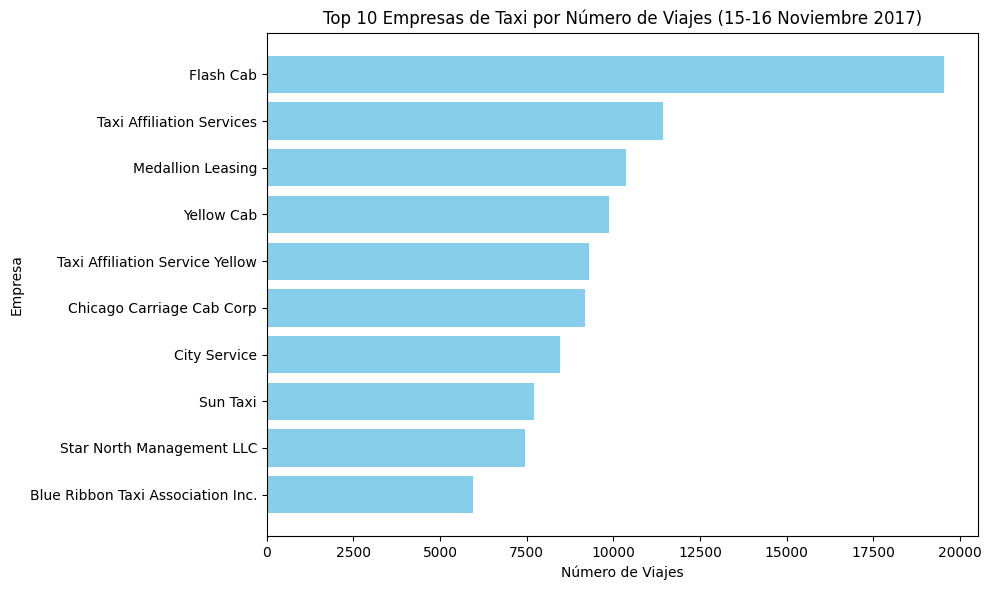

In [4]:
# Seleccionar el top 10
top_10 = companies_df.sort_values(by='trips_amount', ascending=False).head(10)

# Gráfica
plt.figure(figsize=(10,6))
plt.barh(top_10['company_name'], top_10['trips_amount'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Empresas de Taxi por Número de Viajes (15-16 Noviembre 2017)')
plt.xlabel('Número de Viajes')
plt.ylabel('Empresa')
plt.tight_layout()
plt.show()

### 10 barrios principales por número de finalizaciones

<Figure size 1000x500 with 0 Axes>

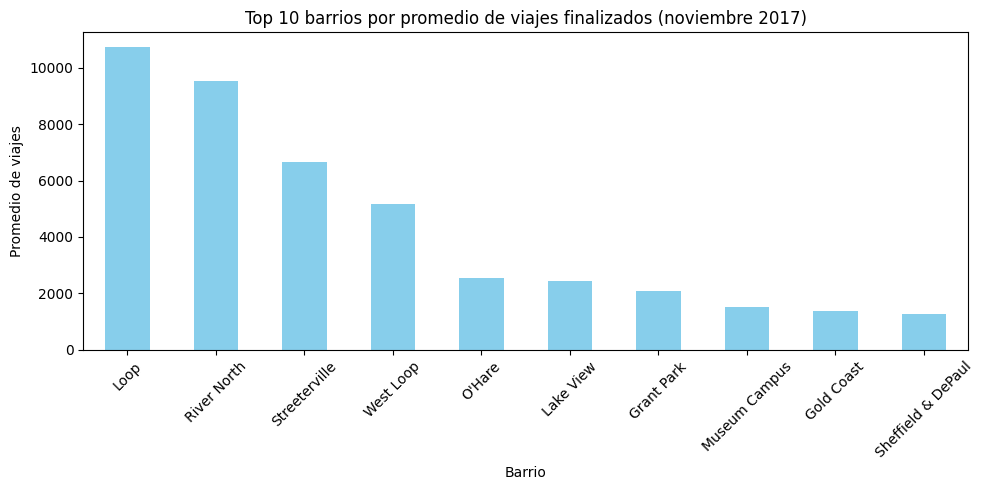

In [5]:
plt.figure(figsize=(10, 5))
top10_neighborhoods.plot(
    x='dropoff_location_name',
    y='average_trips',
    kind='bar',
    legend=False,
    color='skyblue',
    figsize=(10, 5)
)
plt.title('Top 10 barrios por promedio de viajes finalizados (noviembre 2017)')
plt.ylabel('Promedio de viajes')
plt.xlabel('Barrio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusiones

### Gráfico 1: Número de viajes por empresa de taxis (15-16 nov 2017)

***Observaciones:***

- Flash Cab, Taxi Affiliation Services y Medallion Le dominan ampliamente el volumen de viajes en el período.
- Las diferencias son marcadas: Flash Cab realiza casi el doble de viajes que su competidor más cercano.

***Conclusiones:***

El mercado de taxis muestra una alta concentración de viajes en pocas compañías, lo cual puede influir en decisiones regulatorias o de competencia.
Las compañías con menos viajes podrían estar enfocadas en nichos específicos, tener flotas más pequeñas o enfrentar desventajas competitivas.

### Gráfico 2: Top 10 barrios por promedio de viajes finalizados (noviembre 2017)

***Observaciones:***

- Loop, River North y Streeterville concentran los mayores promedios de viajes finalizados. Estas zonas son probablemente centros de actividad comercial, hotelera o turística.

***Conclusiones:***

Las zonas con mayor promedio de viajes sugieren alta demanda de transporte y podrían ser prioritarias para la asignación de flotas o promociones.

**Conclusión general**
El análisis revela patrones claros de concentración tanto en términos de empresas dominantes como de zonas geográficas con alta demanda. Estas tendencias ofrecen información estratégica valiosa para empresas de taxis, reguladores y desarrolladores de soluciones de movilidad.

- Las empresas con más viajes fueron aquellas con nombres más reconocidos como "Flash Cab".
- Se puede indicar un patrón de movilidad relacionado con centros de trabajo o de conexión como estaciones o aeropuertos.

# Prueba de hipótesis (Python)

## Hipótesis

**"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".**

### Planteamiento de Hipótesis

**Hipótesis nula (H₀):** La duración promedio de los viajes desde el Loop hasta el Aeropuerto O’Hare es igual en sábados lluviosos y no lluviosos.

**Hipótesis alternativa (H₁):** La duración promedio de los viajes es diferente en sábados lluviosos.

### Nivel de significancia
α = 0.05

### Método
Antes de realizar la prueba t, se aplicó la **prueba de Levene** para evaluar la igualdad de varianzas entre ambos grupos:

- Si `p > 0.05`, no se rechaza la igualdad de varianzas → se usa `equal_var=True`.
- Si `p ≤ 0.05`, se rechaza la igualdad de varianzas → se usa `equal_var=False`.

Con base en el resultado de Levene, se aplicó la prueba **t de Student para muestras independientes**, considerando el parámetro `equal_var` correspondiente.


In [6]:
# Mostrar valores únicos de weather_conditions para confirmar
unique_conditions = weather_df['weather_conditions'].unique()

# Filtrar los datos en dos grupos
durations_bad = weather_df[weather_df['weather_conditions'] == 'Bad']['duration_seconds']
durations_good = weather_df[weather_df['weather_conditions'] == 'Good']['duration_seconds']

# Prueba de Levene para comparar varianzas entre viajes en sábados lluviosos y no lluviosos
stat_levene, p_levene = levene(durations_bad, durations_good)

# Determinar si se pueden asumir varianzas iguales (p > 0.05)
equal_var_assumption = p_levene > 0.05

print("Resultado de la prueba de Levene:")
print(f"Estadístico: {stat_levene:.4f}, p-value: {p_levene:.4f}")
print("¿Se asume igualdad de varianzas?:", "Sí" if equal_var_assumption else "No")

# Prueba t de Student con el resultado de Levene
t_stat, p_value = ttest_ind(durations_bad, durations_good, equal_var=equal_var_assumption)

print("\nResultado de la prueba t de Student:")
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4e}")


Resultado de la prueba de Levene:
Estadístico: 0.3885, p-value: 0.5332
¿Se asume igualdad de varianzas?: Sí

Resultado de la prueba t de Student:
t-statistic: 6.9462, p-value: 6.5180e-12


## Resultados

- La duración promedio **sí cambia significativamente** entre sábados con lluvia y sin lluvia.
- Esto se evidencia en un **valor p < 0.05**, lo que nos lleva a **rechazar la hipótesis nula**.

## Conclusión

El clima lluvioso tiene un impacto estadísticamente significativo en la duración de los viajes entre el Loop y O’Hare los sábados.


# Resumen del Proyecto: Análisis de Viajes para Zuber en Chicago

**Objetivo**

Zuber, una nueva empresa de viajes compartidos en Chicago, busca entender las preferencias de los pasajeros y el impacto de factores externos como el clima en la duración y frecuencia de los viajes. El objetivo fue:

1. Analizar datos de viajes y clima.
   - Se extrajeron datos meteorológicos de noviembre de 2017 en Chicago desde un archivo HTML. Se organizó en un DataFrame llamado weather_records, utilizando BeautifulSoup y pandas.read_html().

2. Comparar el rendimiento de empresas competidoras.
    - Cantidad de viajes por empresa (15-16 de nov.):
      - Flash Cab: 64,084 viajes
      - Taxi Affiliation Services: 37,583 viajes
      - Otras: 335,771 viajes
      
3. Probar una hipótesis sobre el impacto del clima en viajes desde el centro de la ciudad (Loop) al Aeropuerto O'Hare.
    - Se etiquetaron las condiciones climáticas por hora como Good o Bad según la presencia de “rain” o “storm”.
    - Se identificaron los viajes que comenzaron en Loop (id 50) y terminaron en O’Hare (id 63) los sábados.
    - Estos viajes se unieron a los registros climáticos por hora.
      
4. Visualización de gráficos:
    - Empresas con más viajes:
        - Flash Cab, Taxi Affiliation Services y Medallion Le dominan ampliamente el volumen de viajes en el período.
    - Destinos más frecuentes de noviembre:
        - Los barrios más populares como Loop, Near North Side y River North destacaron por su alto volumen de descensos de pasajeros.
          
5. Prueba de Hipótesis

Dado que p < 0.05, rechazamos H₀. Existe una diferencia significativa en la duración promedio de los viajes los sábados lluviosos. Es probable que el clima adverso aumente la duración de los viajes.

**Conclusión General**

Las empresas "Flash Cab" y "Taxi Affiliation Services" destacan entre la competencia.
El clima afecta significativamente la duración de los viajes, especialmente en días lluviosos.
Zuber puede utilizar esta información para ajustar precios dinámicos, mejorar tiempos de espera y optimizar la asignación de vehículos durante mal tiempo.
